In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('qatar-monthly-statistics-population-by-gender.csv', sep= ";")


df["Month"] = pd.to_datetime(df["Month"], format="%Y-%m")

df['Jahr'] = df['Month'].dt.year
df['Monat'] = df["Month"].dt.month

df['population'] = df['Males'] + df['Females']



df.head()




,Month,Males,Females,Jahr,Monat,population
0,2024-11-01,2226071.0,946953.0,2024,11,3173024.0
1,2024-10-01,2185563.0,905457.0,2024,10,3091020.0
2,2024-09-01,2206422.0,932791.0,2024,9,3139213.0
3,2024-08-01,2162447.0,891918.0,2024,8,3054365.0
4,2024-07-01,2044163.0,743412.0,2024,7,2787575.0


In [2]:
#not a number 
print(df.isna().sum())


Month         0
Males         0
Females       0
Jahr          0
Monat         0
population    0
dtype: int64


In [3]:
#Letzter Tag

print(df.iloc[-1])

Month         2018-01-01 00:00:00
Males                   1989237.0
Females                  654491.0
Jahr                         2018
Monat                           1
population              2643728.0
Name: 82, dtype: object


Text(0.5, 0, 'Jahr')

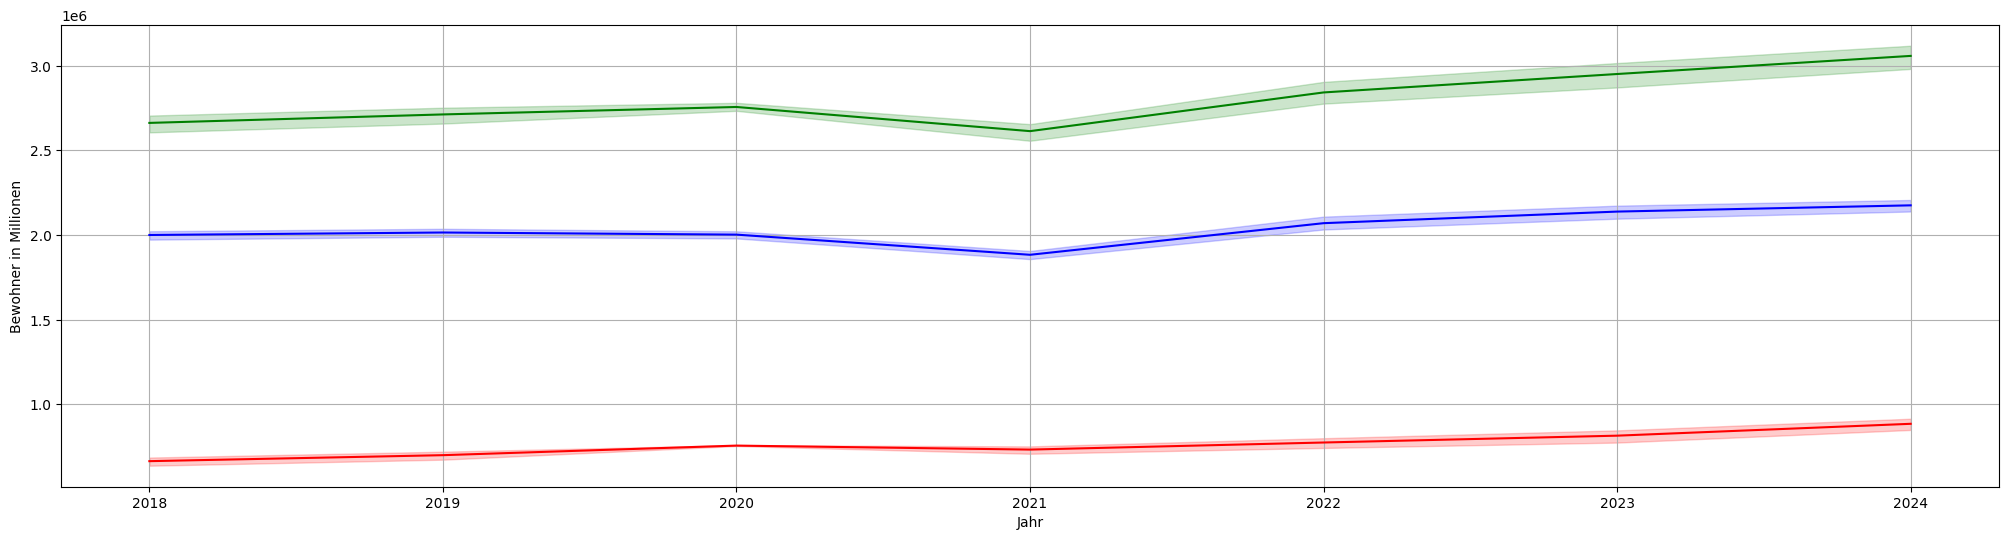

In [4]:

plt.figure(figsize=(25, 6))
plt.grid(True)

axf = sns.lineplot(x=df['Jahr'],
                y=df['Females'],
                color= 'red')

axm = sns.lineplot(x=df['Jahr'],
                y=df['Males'],
                color= 'blue')

axp = sns.lineplot(x=df['Jahr'],
                y=df['population'],
                color= 'green')




axm.set_ylabel('Bewohner in Millionen')
axf.set_xlabel('Jahr')






In [5]:
#Numpy array für Jahr
xs = df['Jahr'].to_numpy().reshape(-1,1)
print(xs.shape)


(83, 1)


In [6]:
#Numpy array für M und W

ysm = df['Males'].to_numpy()
print(ysm.shape)

ysf = df['Females'].to_numpy()
print(ysm.shape)

ysp = df['population'].to_numpy()
print(ysp.shape)

(83,)
(83,)
(83,)


In [7]:
from sklearn.linear_model import LinearRegression

#Für Männer
modelmen = LinearRegression()
modelmen.fit(xs, ysm)

#y = a * x + b
print(modelmen.coef_)  #a
print(modelmen.intercept_) #b

[29617.42256376]
-57816791.2752469


In [8]:
#Für Frauen
modelwomen = LinearRegression()
modelwomen.fit(xs, ysf)

#y = a * x + b
print(modelwomen.coef_)  # a 
print(modelwomen.intercept_) # b 



[32313.20326552]
-64545750.310334615


In [9]:
#Für population
modelpop = LinearRegression()
modelpop.fit(xs, ysp)

#y = a * x + b
print(modelpop.coef_)  # a 
print(modelpop.intercept_) # b 


[61930.62582928]
-122362541.5855815


In [10]:
#test Männer

def get_men(Jahr):
    return 29617.42256376 * Jahr -57816791.2752469

print(get_men(2000))

1418053.8522730917


In [11]:
#test Frauen

def get_women(Jahr):
    return 32313.20326552 * Jahr -64545750.310334615

print(get_women(2000))

80656.22070538253


In [12]:
#test pop

def get_pop(Jahr):
    return 61930.62582928 * Jahr -122362541.5855815

print(get_pop(2000))

1498710.0729784966


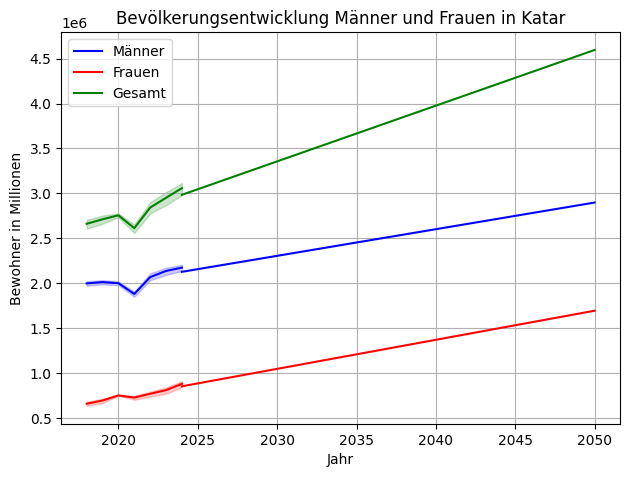

In [13]:
x_pred = np.array([2050,2024])
y_pred = modelmen.predict(x_pred.reshape(-1,1))



#männer
axm = sns.lineplot(x = x_pred, y = y_pred, color= 'blue')

sns.lineplot(x=df['Jahr'],
                y=df['Males'],
                color= 'blue',
                ax=axm,
                label='Männer')





y_pred = modelwomen.predict(x_pred.reshape(-1,1))

#frauen
axm = sns.lineplot(x = x_pred, y = y_pred, color = 'red')

sns.lineplot(x=df['Jahr'],
                y=df['Females'],
                color= 'red',
                ax=axm,
                label='Frauen')



y_pred = modelpop.predict(x_pred.reshape(-1,1))

#population
axm = sns.lineplot(x = x_pred, y = y_pred, color = 'green')
sns.lineplot(x=df['Jahr'],
                y=df['population'],
                color= 'green',
                ax=axm,
                label='Gesamt')


#aussehen



axm.set_ylabel('Bewohner in Millionen', fontsize=10)
axf.set_xlabel('Jahr', fontsize=14)

plt.tight_layout()
plt.title('Bevölkerungsentwicklung Männer und Frauen in Katar')
plt.legend()
plt.grid(True)



